# <b> Long-Term forecast of energy commodities price using Random Forest and Artificial neural network </b>

## Loading libraryies and raeding the dataset

In [479]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime

%matplotlib inline
data=pd.read_excel("Long-term forecast of energy commodities price using machine.xlsx", index_col=None)
data.head()

,Date,"Crude Oil (petroleum), Dated Brent","Log-return Crude Oil (petroleum), Dated Brent","Crude Oil (petroleum), West Texas Intermediate","Log-return Crude Oil (petroleum), West Texas Intermediate","Coal, Australian thermal coal","Log-return Coal, Australian thermal coal","Crude Oil (petroleum), Dubai Fateh","Log-return Crude Oil (petroleum), Dubai Fateh",Russian Natural Gas border price in Germany,Log-return Russian Natural Gas border price in Germany,Natural Gas spot price at the Henry Hub terminal in Louisiana,Log-return Natural Gas spot price at the Henry Hub terminal in Louisiana
0,1980M1,40.00,0.0000,37.00,0.0000,39.6966,0.000000,38.00,0.000000,NaN,NaN,NaN,NaN
1,1980M2,38.50,-0.0382,37.04,0.0011,40.2581,0.014046,36.00,-0.054067,NaN,NaN,NaN,NaN
2,1980M3,38.25,-0.0065,39.52,0.0648,40.8276,0.014046,35.75,-0.006969,NaN,NaN,NaN,NaN
3,1980M4,38.15,-0.0026,39.50,-0.0005,41.4051,0.014046,35.00,-0.021202,NaN,NaN,NaN,NaN
4,1980M5,38.50,0.0091,39.50,0.0000,41.9907,0.014046,35.60,0.016998,NaN,NaN,NaN,NaN


# Converting the Date to datetime opject 

In [480]:
data['Date']=data['Date'].str.replace('M','-')
data['Date']=pd.to_datetime(data['Date'], format='%Y-%m')

In [481]:
data.head()

,Date,"Crude Oil (petroleum), Dated Brent","Log-return Crude Oil (petroleum), Dated Brent","Crude Oil (petroleum), West Texas Intermediate","Log-return Crude Oil (petroleum), West Texas Intermediate","Coal, Australian thermal coal","Log-return Coal, Australian thermal coal","Crude Oil (petroleum), Dubai Fateh","Log-return Crude Oil (petroleum), Dubai Fateh",Russian Natural Gas border price in Germany,Log-return Russian Natural Gas border price in Germany,Natural Gas spot price at the Henry Hub terminal in Louisiana,Log-return Natural Gas spot price at the Henry Hub terminal in Louisiana
0,1980-01-01,40.00,0.0000,37.00,0.0000,39.6966,0.000000,38.00,0.000000,NaN,NaN,NaN,NaN
1,1980-02-01,38.50,-0.0382,37.04,0.0011,40.2581,0.014046,36.00,-0.054067,NaN,NaN,NaN,NaN
2,1980-03-01,38.25,-0.0065,39.52,0.0648,40.8276,0.014046,35.75,-0.006969,NaN,NaN,NaN,NaN
3,1980-04-01,38.15,-0.0026,39.50,-0.0005,41.4051,0.014046,35.00,-0.021202,NaN,NaN,NaN,NaN
4,1980-05-01,38.50,0.0091,39.50,0.0000,41.9907,0.014046,35.60,0.016998,NaN,NaN,NaN,NaN


# Removing the Log-return from the dataset

In [482]:
df=pd.DataFrame()
#something= data.loc[:, "Log-return" not in data.columns]



for (colname, colval)in data.iteritems():
    
    if "Log-return" not in colname:
        df[colname]=data[colname]
df.head()

,Date,"Crude Oil (petroleum), Dated Brent","Crude Oil (petroleum), West Texas Intermediate","Coal, Australian thermal coal","Crude Oil (petroleum), Dubai Fateh",Russian Natural Gas border price in Germany,Natural Gas spot price at the Henry Hub terminal in Louisiana
0,1980-01-01,40.00,37.00,39.6966,38.00,NaN,NaN
1,1980-02-01,38.50,37.04,40.2581,36.00,NaN,NaN
2,1980-03-01,38.25,39.52,40.8276,35.75,NaN,NaN
3,1980-04-01,38.15,39.50,41.4051,35.00,NaN,NaN
4,1980-05-01,38.50,39.50,41.9907,35.60,NaN,NaN


# Dataset analysis 

In [483]:
df=df.drop([df.iloc[:,1].name] ,axis=1)


In [484]:
df.describe()

,"Crude Oil (petroleum), West Texas Intermediate","Coal, Australian thermal coal","Crude Oil (petroleum), Dubai Fateh",Russian Natural Gas border price in Germany,Natural Gas spot price at the Henry Hub terminal in Louisiana
count,450.000000,450.000000,450.000000,390.000000,318.000000
mean,41.309404,52.475415,39.737580,5.097373,3.875465
std,27.720572,29.603735,30.246714,3.510788,2.260123
min,11.310000,24.000000,8.500000,1.444444,1.148500
25%,20.045000,32.061825,17.000000,2.490000,2.211825
50%,30.334300,39.500000,27.520000,3.460000,3.150950
75%,54.195200,62.769875,53.060000,7.790000,5.012600
max,133.930000,195.186300,131.220000,16.020000,13.633800


##### As can be seen in the Describetion of the Data that Russian Natural Gas Has missing entries and also in Louisiana Natrual Gas and also it can be seen that all entiers are float64 except the Date

# show corrleation between the price and the Date

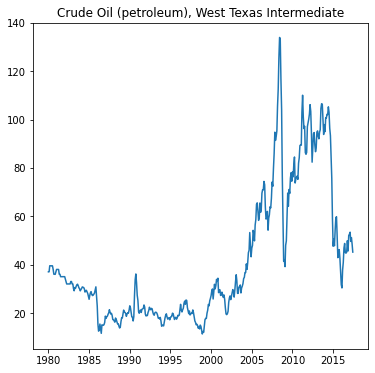

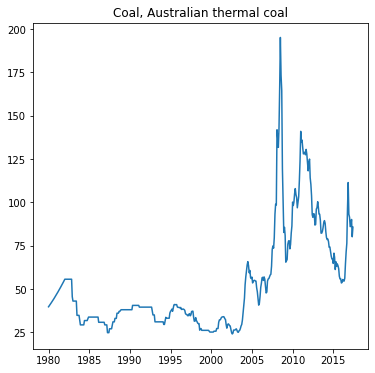

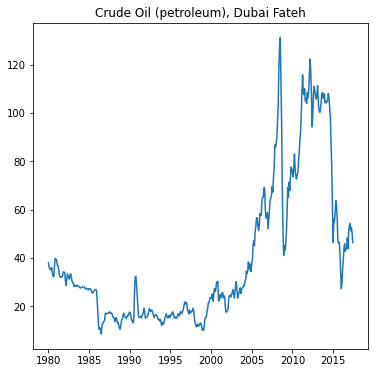

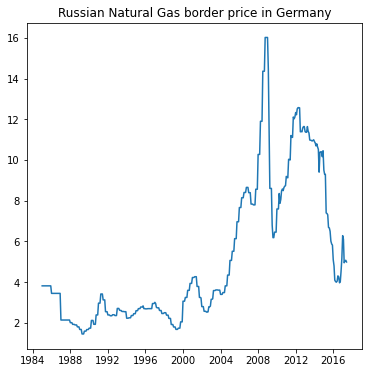

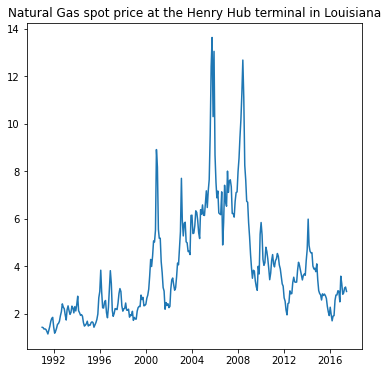

In [485]:

for (colname, colval)in df.iteritems():
    if colname!="Date":
        %matplotlib inline
        fig, ax = plt.subplots(figsize=(6, 6))
        plt.title(colname)
        plt.plot(data.Date, colval.values)
        plt.show()


##### As can be seen that the relation between the Price and Date is not leanier for that we will use non-linear models

In [486]:
df.columns

Index(['Date', 'Crude Oil (petroleum), West Texas Intermediate',
       'Coal, Australian thermal coal', 'Crude Oil (petroleum), Dubai Fateh',
       'Russian Natural Gas border price in Germany',
       'Natural Gas spot price at the Henry Hub terminal in Louisiana'],
      dtype='object')

# Preprossing the DateTime 

In [487]:
# df["Price"]=df["Crude Oil (petroleum),  Dated Brent"]
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['quarter']= pd.to_datetime(df['Date']).dt.quarter

df


,Date,"Crude Oil (petroleum), West Texas Intermediate","Coal, Australian thermal coal","Crude Oil (petroleum), Dubai Fateh",Russian Natural Gas border price in Germany,Natural Gas spot price at the Henry Hub terminal in Louisiana,Year,month,quarter
0,1980-01-01,37.0000,39.6966,38.000000,NaN,NaN,1980,1,1
1,1980-02-01,37.0400,40.2581,36.000000,NaN,NaN,1980,2,1
2,1980-03-01,39.5200,40.8276,35.750000,NaN,NaN,1980,3,1
3,1980-04-01,39.5000,41.4051,35.000000,NaN,NaN,1980,4,2
4,1980-05-01,39.5000,41.9907,35.600000,NaN,NaN,1980,5,2
...,...,...,...,...,...,...,...,...,...
445,2017-02-01,53.4015,85.9693,54.171000,6.100298,2.8200,2017,2,1
446,2017-03-01,49.5848,86.3339,51.164348,4.945020,2.8745,2017,3,1
447,2017-04-01,51.1680,90.1107,52.447500,5.035127,3.0820,2017,4,2
448,2017-05-01,48.5596,80.1184,50.304348,5.067728,3.1243,2017,5,2


# Seperating the Data and Droping rows that has Empty Price 

In [488]:

West_Taxas =df.drop(df.columns[2:-3], axis=1).dropna()
Australian =df.drop(df.columns[3:-3], axis=1).drop(["Crude Oil (petroleum), West Texas Intermediate"],axis=1).dropna()
Dubai =df.drop(df.columns[4:-3], axis=1).drop(["Crude Oil (petroleum), West Texas Intermediate"],axis=1).drop(["Coal, Australian thermal coal"],axis=1).dropna()
Russian=df.drop(df.columns[5:-3], axis=1).drop(["Crude Oil (petroleum), West Texas Intermediate"],axis=1).drop(["Coal, Australian thermal coal"],axis=1).drop(["Crude Oil (petroleum), Dubai Fateh"],axis=1).dropna()
Louisiana=df.drop(df.columns[6:-4], axis=1).dropna()
West_Taxas

,Date,"Crude Oil (petroleum), West Texas Intermediate",Year,month,quarter
0,1980-01-01,37.0000,1980,1,1
1,1980-02-01,37.0400,1980,2,1
2,1980-03-01,39.5200,1980,3,1
3,1980-04-01,39.5000,1980,4,2
4,1980-05-01,39.5000,1980,5,2
...,...,...,...,...,...
445,2017-02-01,53.4015,2017,2,1
446,2017-03-01,49.5848,2017,3,1
447,2017-04-01,51.1680,2017,4,2
448,2017-05-01,48.5596,2017,5,2


 # Adding the previous pricess as a feature 

In [489]:
def Lag_adding(df, Lag_Number=12):
    dataframe = pd.DataFrame()
    for i in range(Lag_Number, 0, -1):
        dataframe['t-' + str(i)] = df[df.columns[1]].shift(i)
    df4 = pd.concat([df, dataframe], axis=1)
    df4.dropna(inplace=True)
    return df4


In [490]:
#adding to all dataset 
#Brent=Lag_adding(Brent,72)
West_Taxas=Lag_adding(West_Taxas,18)
Australian=Lag_adding(Australian,39)
Dubai=Lag_adding(Dubai,39)
Russian=Lag_adding(Russian,16)
Louisiana=Lag_adding(Louisiana,13)

# Listing of approiate evaluation mesures 

####  For the evluation messures I will be using the root mean square error (RMSE)  and the mean absoute precentage error  (MAPE)  because they are the most widely used statistical loss functions. also the models needs to preform better than the mean price for each dataset.

In [491]:
def RMSE(  predict,Acatual):
    return sqrt(sum((predict-Acatual)**2)/len(Acatual))

In [492]:
def MAPE(predict, Acatual):
    return sum(abs(predict-Acatual))/len(Acatual)

# List of classifiers used
### 1- Artificial neural network
### 2- Random forest 
### the resason for chossing these two classfiers is that they are non-linear algorithms since the relation between time and price is non-linear 

# dividing the Dataset the first 80% for training and 10% for validation last 10% for testing 
#### It has been done Sequentionaly because using cross validation would not be sufficent for this type of problem  

In [493]:
def divid_set(dataset,persentT=0.7,persentV=0.1):
    Train ,Val, Test = dataset[:int(len(dataset)*persentT)], dataset[int(len(dataset)*persentT):int(len(dataset)* (persentT+persentV) )],dataset[int(len(dataset)* (persentT+persentV) ):]
    Trainy=Train.iloc[:,1].reset_index(drop=True)
    TrainX=Train.drop([Trainy.name,"Date"], axis=1).reset_index(drop=True)
    Valy=Val.iloc[:,1].reset_index(drop=True)
    ValX=Val.drop([Trainy.name,"Date"], axis=1).reset_index(drop=True)
    Testy=Test.iloc[:,1].reset_index(drop=True)
    TestX=Test.drop([Trainy.name,"Date"], axis=1).reset_index(drop=True)
    return TrainX, Trainy,ValX, Valy, TestX, Testy

#### Spliting all data 

In [494]:

West_Taxas_TrainX, West_Taxas_Trainy,West_Taxas_ValX, West_Taxas_Valy, West_Taxas_TestX, West_Taxas_Testy= divid_set(West_Taxas)
Australian_TrainX, Australian_Trainy, Australian_ValX, Australian_Valy, Australian_TestX, Australian_Testy=divid_set(Australian)
Dubai_TrainX, Dubai_Trainy, Dubai_ValX,  Dubai_Valy, Dubai_TestX,Dubai_Testy=divid_set(Dubai)
Russian_TrainX, Russian_Trainy,Russian_ValX, Russian_Valy,Russian_TestX, Russian_Testy=divid_set(Russian) 
Louisiana_TrainX, Louisiana_Trainy, Louisiana_ValX, Louisiana_Valy,Louisiana_TestX, Louisiana_Testy=divid_set(Louisiana)


# Random Forest implementation  

In [495]:
West_Taxas_Trainy

0      35.00
1      35.00
2      35.00
3      35.00
4      35.00
       ...  
297    69.54
298    70.93
299    70.93
300    74.40
301    73.04
Name: Crude Oil (petroleum), West Texas Intermediate, Length: 302, dtype: float64

In [496]:
def Plot_Graph(True_Value, Pred_Value,X_Value ,  True_Name, Pred_Name):
    X=pd.DataFrame()
    X['date']=(X_Value.Year.map(str)+"-"+X_Value.month.map(str)+"-1")
    X.date=pd.to_datetime(X.date)
    plt.plot( X.date, Pred_Value, color="b" , label=Pred_Name)
    plt.plot(X.date, True_Value ,color="r", label=True_Name)
    plt.legend()
    plt.show()

In [497]:
from sklearn.ensemble import RandomForestRegressor

def Random_Forest(TrainX, Trainy , n_estimators):
    ##we use GridSearchCV for tuning the paramters and getting the best result
    limit=len(TrainX.columns)
    max_list=[7,36,9]
    max_list=list(filter(lambda x: x <= limit, max_list))
    param_grid = {
        'n_estimators': [ 500 ],
        'max_features': max_list
  
    }
    regr = RandomForestRegressor(random_state=3)
    GSCV = GridSearchCV(estimator=regr, param_grid=param_grid)

    GSCV.fit(TrainX, Trainy.values.ravel())
    print(GSCV.best_params_ )
    return GSCV

In [541]:
from sklearn.ensemble import RandomForestRegressor

West_Taxas_RF=RandomForestRegressor(random_state=3,n_estimators=500,max_features=7)
West_Taxas_RF.fit(West_Taxas_TrainX, West_Taxas_Trainy.values.ravel())
#Australina_RF=RandomForestRegressor(random_state=3,n_estimators=500,max_features=36)
#Australina_RF.fit(Australian_TrainX, Australian_Trainy.values.ravel())
Dubai_RF=RandomForestRegressor(random_state=3,n_estimators=500,max_features=37)
Dubai_RF.fit(Dubai_TrainX, Dubai_Trainy.values.ravel())
Russian_RF=RandomForestRegressor(random_state=3,n_estimators=500,max_features=9)
Russian_RF.fit(Russian_TrainX, Russian_Trainy.values.ravel())
Louisiana_RF=RandomForestRegressor(random_state=3,n_estimators=500,max_features=7)
Louisiana_RF.fit(Louisiana_TrainX, Louisiana_Trainy.values.ravel())
print("Done")

Done


In [537]:
Australina_RF=RandomForestRegressor(random_state=3,n_estimators=1000,max_features=36,ccp_alpha=0.4)
Australina_RF.fit(Australian_TrainX, Australian_Trainy.values.ravel())

RandomForestRegressor(ccp_alpha=0.4, max_features=36, n_estimators=1000,
                      random_state=3)

In [542]:
West_Pred=West_Taxas_RF.predict(West_Taxas_ValX)
Aust_Pred=Australina_RF.predict(Australian_ValX)
Dubai_Pred=Dubai_RF.predict(Dubai_ValX)
Russian_Pred=Russian_RF.predict(Russian_ValX)
Louis_Pred=Louisiana_RF.predict(Louisiana_ValX)

print("Random Forest West Taxas RMSE =",RMSE(West_Pred, West_Taxas_Valy.values.ravel()) ," , MAPE = ", MAPE(West_Pred,West_Taxas_Valy.values.ravel())  )
print("Random Forest Australina RMSE =",RMSE(Aust_Pred, Australian_Valy.values.ravel()) ," , MAPE = ", MAPE(Aust_Pred, Australian_Valy.values.ravel())  )
print("Random Forest Russian RMSE =",RMSE(Russian_Pred, Russian_Valy.values.ravel()) ," , MAPE = ", MAPE(Russian_Pred, Russian_Valy.values.ravel())  )
print("Random Forest Louisiana RMSE =",RMSE(Louis_Pred, Louisiana_Valy.values.ravel()) ," , MAPE = ", MAPE(Louis_Pred, Louisiana_Valy.values.ravel())  )
print("Random Forest Dubai RMSE =",RMSE(Dubai_Pred, Dubai_Valy.values.ravel()) ," , MAPE = ", MAPE(Dubai_Pred, Dubai_Valy.values.ravel())  )


Random Forest West Taxas RMSE = 23.43218223703325  , MAPE =  17.834411162790623
Random Forest Australina RMSE = 52.99018698994287  , MAPE =  41.05631575516652
Random Forest Russian RMSE = 3.3124166561098125  , MAPE =  2.4257931578947414
Random Forest Louisiana RMSE = 8.982449671423455  , MAPE =  6.5064782266669035
Random Forest Dubai RMSE = 24.352296465195582  , MAPE =  17.811098652195174


In [543]:
Louis_TrainTT=Louisiana_RF.predict(Louisiana_TrainX)
print("Random Forest Brent RMSE =",RMSE( Louis_TrainTT,Louisiana_Trainy.values.ravel()) ," , MAPE = ", MAPE(Louis_TrainTT,Louisiana_Trainy.values.ravel())  )


Random Forest Brent RMSE = 1.1666191311931655  , MAPE =  0.6607121859154758


Random Forest Brent RMSE = 4.384310605918755  , MAPE =  2.355894220327886


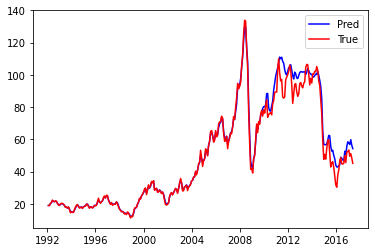

In [544]:
LS_Y=Louisiana.iloc[:,1].reset_index(drop=True)
LS_X=Louisiana.drop([LS_Y.name,"Date" ], axis=1).reset_index(drop=True)
LS_Pred = Louisiana_RF.predict(LS_X)
print("Random Forest Brent RMSE =",RMSE( LS_Pred,LS_Y.values.ravel()) ," , MAPE = ", MAPE(LS_Pred,LS_Y.values.ravel())  )
Plot_Graph(LS_Y,LS_Pred, LS_X,"True","Pred")

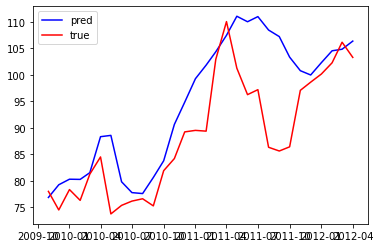

In [545]:
#Plot_Graph(True_Value, Pred_Value,X_Value ,  True_Name, Pred_Name):
test=Louisiana_RF.predict(Louisiana_ValX)

Plot_Graph(Louisiana_Valy, test, Louisiana_ValX, "true", "pred")

In [546]:
#print("Random Forest Dubai RMSE =",RMSE(Dubai_Pred, Dubai_Valy.values.ravel()) ," , MAPE = ", MAPE(Dubai_Pred, Dubai_Valy.values.ravel())  )

len(Brent_Pred)
#len(Brent_Valy.values)

36

In [547]:
lop=sum(Train.Price)/len(Train)
print(sqrt(sum((lop-Testy)**2)/len(Testy)))
sqrt(sum((74.6695-Testy)**2)/len(Testy))

NameError: name 'Train' is not defined

In [548]:
Brent
#West_Taxas
#Australian
#Dubai
#Russian
#Louisiana

,Date,"Crude Oil (petroleum), Dated Brent",Year,month,quarter
0,1980-01-01,40.0000,1980,1,1
1,1980-02-01,38.5000,1980,2,1
2,1980-03-01,38.2500,1980,3,1
3,1980-04-01,38.1500,1980,4,2
4,1980-05-01,38.5000,1980,5,2
...,...,...,...,...,...
445,2017-02-01,55.4935,2017,2,1
446,2017-03-01,51.9683,2017,3,1
447,2017-04-01,53.0635,2017,4,2
448,2017-05-01,50.8709,2017,5,2


# Artificial neural network 

In [549]:
(len(Australian_HTrainX), len(Brent_HTrainX))


(308, 308)

In [550]:
Brent_HTrainX.columns

Index(['Year', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2',
       't-1', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'quarter_1', 'quarter_2', 'quarter_3', 'quarter_4'],
      dtype='object')

#### Hot encoding month and quarters 

In [551]:
def Hot_encode(data):
    result=pd.concat([data ,pd.get_dummies(data['month'], prefix='month')],axis=1)
    result=pd.concat([result ,pd.get_dummies(result['quarter'], prefix='quarter')],axis=1)
    return result.drop(["month", "quarter"], axis=1)
    

In [552]:

#Brent_HTrainX=Hot_encode(Brent_TrainX)
West_Taxas_HTrainX=Hot_encode(West_Taxas_TrainX)
Australian_HTrainX=Hot_encode(Australian_TrainX)
Dubai_HTrainX=Hot_encode(Dubai_TrainX)
Russian_HTrainX=Hot_encode(Russian_TrainX)
Louisiana_HTrainX=Hot_encode(Louisiana_TrainX)
West_Taxas_HTrainX.head()

,Year,t-18,t-17,t-16,t-15,t-14,t-13,t-12,t-11,t-10,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
0,1981,37.00,37.04,39.52,39.50,39.50,39.50,39.49,38.01,36.02,...,1,0,0,0,0,0,0,0,1,0
1,1981,37.04,39.52,39.50,39.50,39.50,39.49,38.01,36.02,36.00,...,0,1,0,0,0,0,0,0,1,0
2,1981,39.52,39.50,39.50,39.50,39.49,38.01,36.02,36.00,35.98,...,0,0,1,0,0,0,0,0,1,0
3,1981,39.50,39.50,39.50,39.49,38.01,36.02,36.00,35.98,36.99,...,0,0,0,1,0,0,0,0,0,1
4,1981,39.50,39.50,39.49,38.01,36.02,36.00,35.98,36.99,38.00,...,0,0,0,0,1,0,0,0,0,1


#### normalizing the Train set using min-Max because there are some features that are hot encoded

In [553]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

#Brent_Scaler=MinMaxScaler()
#Brent_STrainX=Brent_Scaler.fit_transform(Brent_HTrainX)

West_Taxas_Scaler=MinMaxScaler()
West_Taxas_STrainX=West_Taxas_Scaler.fit_transform(West_Taxas_HTrainX)

Australian_Scaler=MinMaxScaler()
Australian_STrainX=Australian_Scaler.fit_transform(Australian_HTrainX)

Dubai_Scaler=MinMaxScaler()
Dubai_STrainX=Dubai_Scaler.fit_transform(Dubai_HTrainX)

Russian_Scaler=MinMaxScaler()
Russian_STrainX=Russian_Scaler.fit_transform(Russian_HTrainX)

Louisiana_Scaler=MinMaxScaler()
Louisiana_STrainX=Louisiana_Scaler.fit_transform(Louisiana_HTrainX)

In [ ]:
#(len(Brent_STrainX),len(West_Taxas_STrainX))

(308, 308)

In [554]:
def ANN_Regresion(TrainX, Trainy, hidden_Layer=(3,3), LR=0.001, alp=0.001, maxItr=1000):
        ANN = MLPRegressor(random_state=2,max_iter=maxItr , hidden_layer_sizes =hidden_Layer, learning_rate_init=LR , alpha=alp, learning_rate="adaptive")
        ANN.fit(TrainX, Trainy.values.ravel())
        return ANN

In [ ]:
Brent_ANN=ANN_Regresion(Brent_STrainX, Brent_Trainy,hidden_Layer=(9,9,9), LR=0.0001, alp=0.001 , maxItr=100000)
Brent_APred=Brent_ANN.predict(Brent_Scaler.transform(Hot_encode(Brent_ValX)))
print("ANN  Brent RMSE =",RMSE(Brent_APred, Brent_Valy.values.ravel()) ," , MAPE = ", MAPE(Brent_APred, Brent_Valy.values.ravel())  )


ANN  Brent RMSE = 10.626049596514521  , MAPE =  7.941648920171336


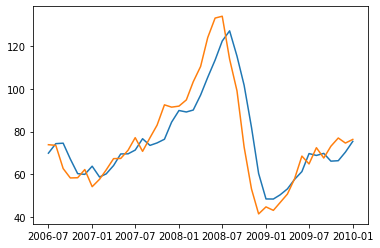

In [ ]:
plt.plot(test_Time.test,Brent_APred )
plt.plot(test_Time.test,Brent_Valy.values.ravel())
plt.show()

In [ ]:
Brent_APred

array([ 69.95231538,  74.39409099,  74.61381144,  67.23663793,
        60.38046762,  60.04954893,  63.86180363,  58.81025138,
        60.27552934,  64.17613784,  69.58934689,  69.64510497,
        71.39776072,  76.69664257,  73.57496128,  74.74125981,
        76.4532478 ,  84.42883908,  89.87563469,  89.18633905,
        90.08944327,  97.08472538, 105.37742517, 113.43526935,
       122.34025987, 127.07707205, 115.27092658, 101.68558671,
        82.01583944,  60.47421425,  48.56993198,  48.53073141,
        50.45552154,  53.25852118,  57.69029203,  61.34810325,
        69.76501097,  68.89160976,  69.8470202 ,  66.22176555,
        66.42989257,  70.44475079,  75.4720093 ])

In [ ]:
Brent_Valy.values.ravel()

array([ 73.9   ,  73.61  ,  62.77  ,  58.38  ,  58.48  ,  62.31  ,
        54.3   ,  57.76  ,  62.14  ,  67.4   ,  67.48  ,  71.32  ,
        77.2   ,  70.8   ,  77.13  ,  83.04  ,  92.53  ,  91.45  ,
        91.92  ,  94.82  , 103.28  , 110.44  , 123.94  , 133.05  ,
       133.9   , 113.85  ,  99.06  ,  72.84  ,  53.24  ,  41.58  ,
        44.86  ,  43.2425,  46.8391,  50.8452,  57.9381,  68.5936,
        64.9165,  72.5048,  67.6868,  73.1941,  77.0367,  74.6695,
        76.373 ])

In [570]:
len(West_Taxas_Scaler.transform(Hot_encode(West_Taxas_ValX))[0])

35

In [571]:
West_ANN=ANN_Regresion(West_Taxas_STrainX, West_Taxas_Trainy,hidden_Layer=(100,), LR=0.0001, alp=0.001 , maxItr=100000)


In [572]:
West_APred=Brent_ANN.predict(West_Taxas_Scaler.transform(Hot_encode(West_Taxas_ValX)))
print("ANN West Taxas RMSE =",RMSE(West_APred, West_Taxas_Valy.values.ravel()) ," , MAPE = ", MAPE(West_APred, West_Taxas_Valy.values.ravel())  )

ValueError: X has 35 features, but MLPRegressor is expecting 27 features as input.

In [556]:
#try harder 
Australian_ANN=ANN_Regresion(Australian_STrainX, Australian_Trainy,hidden_Layer=(9), LR=0.0001, alp=0.001 , maxItr=200000)
Australian_APred=Brent_ANN.predict(Australian_Scaler.transform(Hot_encode(Australian_ValX)))
print("ANN Australian RMSE =",RMSE(Australian_APred, Australian_Valy.values.ravel()) ," , MAPE = ", MAPE(Australian_APred, Australian_Valy.values.ravel())  )

ValueError: X has 56 features, but MLPRegressor is expecting 27 features as input.

In [557]:
Dubai_ANN=ANN_Regresion(Dubai_STrainX, Dubai_Trainy,hidden_Layer=(100,), LR=0.001, alp=0.001 , maxItr=100000)
Dubai_APred=Dubai_ANN.predict(Dubai_Scaler.transform(Hot_encode(Dubai_ValX)))
print("ANN Dubai RMSE =",RMSE(Dubai_APred, Dubai_Valy.values.ravel()) ," , MAPE = ", MAPE(Dubai_APred, Dubai_Valy.values.ravel())  )

ANN Dubai RMSE = 13.743641860466413  , MAPE =  11.70195860694328


In [ ]:
Russian_ANN=ANN_Regresion(Russian_STrainX, Russian_Trainy,hidden_Layer=(5), LR=0.0001, alp=0.001 , maxItr=100000)
Russian_APred=Russian_ANN.predict(Russian_Scaler.transform(Hot_encode(Russian_ValX)))
print("ANN Russian  RMSE =",RMSE(Russian_APred, Russian_Valy.values.ravel()) ," , MAPE = ", MAPE(Russian_APred, Russian_Valy.values.ravel())  )

ANN Russian  RMSE = 2.5083352860536428  , MAPE =  2.0880075143176313


In [ ]:
Louisiana_ANN=ANN_Regresion(Louisiana_STrainX, Louisiana_Trainy,hidden_Layer=(10,5), LR=0.0001, alp=0.001 , maxItr=100000)
Louisiana_APred=Louisiana_ANN.predict(Louisiana_Scaler.transform(Hot_encode(Louisiana_ValX)))
print("ANN Louisiana RMSE =",RMSE(Louisiana_APred, Louisiana_Valy.values.ravel()) ," , MAPE = ", MAPE(Louisiana_APred, Louisiana_Valy.values.ravel())  )

ANN Louisiana RMSE = 0.9879040163947163  , MAPE =  0.8284423237879543


# getting the mean of the price 

In [ ]:
Means=df.mean()
Means[:-3]

C:\Users\96656\AppData\Local\Temp/ipykernel_24948/3152617760.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Means=df.mean()


Crude Oil (petroleum),  Dated Brent                              41.946357
Crude Oil (petroleum), West Texas Intermediate                   41.309404
Coal, Australian thermal coal                                    52.475415
Crude Oil (petroleum), Dubai Fateh                               39.737580
Russian Natural Gas border price in Germany                       5.097373
Natural Gas spot price at the Henry Hub terminal in Louisiana     3.875465
dtype: float64

In [ ]:
print("Using means Brent RMSE =",RMSE(Means[0], Brent_Testy.values.ravel()) ," , MAPE = ", MAPE(Means[0], Brent_Testy.values.ravel())  )
print("Using means West Texas RMSE =",RMSE(Means[1], West_Taxas_Testy.values.ravel()) ," , MAPE = ", MAPE(Means[1], West_Taxas_Testy.values.ravel())  )
print("Using means Australian RMSE =",RMSE(Means[2], Australian_Testy.values.ravel()) ," , MAPE = ", MAPE(Means[2], Australian_Testy.values.ravel())  )
print("Using means Dubai RMSE =",RMSE(Means[3], Dubai_Testy.values.ravel()) ," , MAPE = ", MAPE(Means[3], Dubai_Testy.values.ravel())  )
print("Using means Russian RMSE =",RMSE(Means[4], Russian_Testy.values.ravel()) ," , MAPE = ", MAPE(Means[4], Russian_Testy.values.ravel())  )
print("Using means Louisiana RMSE =",RMSE(Means[5], Louisiana_Testy.values.ravel()) ," , MAPE = ", MAPE(Means[5], Louisiana_Testy.values.ravel())  )


Using means Brent RMSE = 50.90570636813983  , MAPE =  43.03682887407409
Using means West Texas RMSE = 42.47658361002887  , MAPE =  36.21366219753087
Using means Australian RMSE = 44.33104994357264  , MAPE =  37.86977755555555
Using means Dubai RMSE = 50.12214161334588  , MAPE =  42.756622290834585
Using means Russian RMSE = 4.846796820370826  , MAPE =  4.156056783865286
Using means Louisiana RMSE = 1.0818721108946345  , MAPE =  0.9104683372641508


In [ ]:
test_Time=pd.DataFrame()
test_Time['test']=(Brent_ValX.Year.map(str)+"-"+Brent_ValX.month.map(str)+"-1")
test_Time.test=pd.to_datetime(test_Time.test)

In [ ]:
len(test_Time.test)

43

In [ ]:
plt.plot( test_Time.test, test)
plt.plot(test_Time.test, Brent_Valy)
plt.show()

In [76]:
len(test)

89

### Using the mean 
| Data| RMSE | MAPE |
| --- | --- | --- |
| Oil Brent | 50.90570636813983 | 43.03682887407409 |
| Oil WTI | 42.47658361002887 | 36.21366219753087 |
| Oil Dubai|44.33104994357264 | 37.86977755555555 |
| Coal AU | 50.12214161334588 | 42.756622290834585 |
| Gas US | 4.846796820370826 | 4.156056783865286 |
| Gas Russia | 1.0818721108946345 |0.9104683372641508 |



### Random forest
| Data       | RMSE | MAPE |
| ---            | --- | --- |
| Oil Brent | 32.506176296822794 | 28.455086442149053 |
| Oil WTI | 25.37141602811057 | 22.442651462732343 |
| Oil Dubai| 31.138605930156885 | 27.557497090501037 |
| Coal AU | 40.385582949305935 | 33.632782425555554 |
| Gas US |  0.8424008407497212 | 0.6594639359375012 |
| Gas Russia |3.139968512007993 | 2.914170933756378 |


### ANN 
| Data       |      RMSE          | MAPE               |
| ---        | ---------------    | --------------- ---  |
| Oil Brent  | 34.023545778994    | 28.957550668208057 |
| Oil WTI    | 31.797422286045716 | 24.767892876403252 |
| Oil Dubai  | 38.50801845935743  |  31.068686372418117 |
| Coal AU    | 29.727520254487565 | 24.932856262190096 |
| Gas US     | 3.3770808624808084 | 3.2449974981951875 |
| Gas Russia | 3.4627708076347186 | 3.229520217504922 |


# Conclution 
#### based on the result that has been shown above that Random forest has outprormed Articial nueral netwrok in most cases onther htan AU  the case of russia the mean had a better result than both of ANN and Rnadom forest however both ANN and Rondom forest had a good result for this problem but random forest  